# COGS 108 - EDA Checkpoint

# Names

- Cassandra Henrickson
- Daniel Han
- Ezra Lu
- Jasmine Qiang
- Wing Leung (Calvin)

<a id='research_question'></a>
# Research Question

How is the severity of the traffic jam due to a car crash impacted as a result of where the accident occurs and different weather conditions?

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas, numpy, and statistics are imported
import pandas as pd
import numpy as np
import statistics

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [5]:
print('Total observations: ', len(df))

Total observations:  4232541


# Data Cleaning

### 1.1a - Seeing the columns and number of accidents we are working with

In [6]:
#49 different variables
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
# San Diego has 29416 accidents
san_diego = df[df['City'] == 'San Diego']
accident_sandiego = san_diego['City'].count()
accident_sandiego

29416

### 1.1b - Look at the different weather conditions in San Diego and the number of their occurrences

In [8]:
#all of the weather conditions in San Diego
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [9]:
#number of accidents per weather condition
df['Weather_Condition'].value_counts()

Fair                        900872
Clear                       808181
Mostly Cloudy               571743
Partly Cloudy               397415
Overcast                    382485
                             ...  
Mist / Windy                     1
Drifting Snow                    1
Dust Whirls                      1
Blowing Sand                     1
Thunder and Hail / Windy         1
Name: Weather_Condition, Length: 131, dtype: int64

### 1.2 - Slicing the dataframe to only include the columns and variables of interest

In [10]:
#slicing df to only include columns we need - Severity, City, Weather Condition, Junction, Stop, and Traffic Signal
df = df.loc[:, ['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal']]

#slicing to only get car accidents that happened in San Diego
df = df.loc[df['City'] == 'San Diego']

In [11]:
df['Weather_Condition'].unique()

array(['Scattered Clouds', 'Mostly Cloudy', 'Overcast', 'Clear',
       'Partly Cloudy', 'Haze', 'Mist', 'Light Rain', 'Rain',
       'Heavy Rain', nan, 'Fog', 'Drizzle', 'Light Drizzle', 'Cloudy',
       'Fair', 'Partly Cloudy / Windy', 'Smoke', 'Light Snow', 'T-Storm',
       'Thunder in the Vicinity', 'Patches of Fog', 'Heavy T-Storm',
       'Thunderstorms and Rain', 'Heavy Thunderstorms and Rain',
       'Volcanic Ash', 'Shallow Fog', 'Mostly Cloudy / Windy',
       'Rain / Windy', 'Light Rain with Thunder', 'N/A Precipitation',
       'Fair / Windy', 'Heavy Rain / Windy',
       'Light Thunderstorms and Rain'], dtype=object)

### 1.3 - Group different weather conditions together into "Rain", "Cloudy", "Clear", and "Fog".

We decided to combine the different weather data into four main weather categories - Rain, Cloudy, Clear, and Fog, as many of the weather categories are similar (eg "Light Rain" and "Heavy Rain" are both in the "Rain" category) and can lead to similar driving hazards (eg any rain leads to slippery roads). The details of which weather categories we grouped together can be seen below. 

In [12]:
#Combine 'Fair' & 'Fair / Windy' to 'Clear'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair'], 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair / Windy'], 'Clear')

#Combine 'Light Rain' & 'Heavy Rain' & 'Light Rain with Thunder' &
#'Rain / Windy' & 'Thunderstorms and Rain' &
#'Heavy Rain / Windy' & 'Heavy Thunderstorms and Rain' &
#'Light Thunderstorms and Rain' & 'Light Drizzle' & 'Drizzle' to 'Rain'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain with Thunder'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Drizzle'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle'], 'Rain')

#Combined 'Haze' & 'Shallow Fog' & 'Patches of Fog' &
#'Mist' to 'Fog'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Haze'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Shallow Fog'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Patches of Fog'], 'Fog')

#Combine 'Overcast' & 'Mostly Cloudy' &'Partly Cloudy' & 'Mostly Cloudy / Windy' &
#'Partly Cloudy / Windy' to 'Cloudy'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Overcast'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Scattered Clouds'], 'Cloudy')

In [13]:
#number of accidents per weather condition in grouped dataset
df['Weather_Condition'].value_counts()

Cloudy                          15203
Clear                           11162
Rain                             2103
Fog                               740
Mist                               12
Thunder in the Vicinity            11
Light Snow                          9
Smoke                               5
T-Storm                             2
N/A Precipitation                   2
Heavy T-Storm                       2
Light Thunderstorms and Rain        1
Volcanic Ash                        1
Name: Weather_Condition, dtype: int64

### 1.4a - Grouping traffic accidents that took place elsewhere on the road in a separate column 

In [14]:
#group all other traffic accidents that occurred elsewhere on the road into a column "other place"
#if 'other place' = 'True', accident took place other than at a Junction, Stop, or Traffic Signal

df['equal_or_lower_than_3?'] = df[df==False].count(axis=1)
df['Other place'] = df['equal_or_lower_than_3?'].apply(lambda x: 'True' if x == 3 else 'False')

#set order of column names
df = df[['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal', 'equal_or_lower_than_3?','Other place']]


df.head(7)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,equal_or_lower_than_3?,Other place
42886,3,San Diego,Cloudy,False,False,False,3,True
42887,3,San Diego,Cloudy,False,False,False,3,True
42905,2,San Diego,Cloudy,False,False,False,3,True
42909,3,San Diego,Cloudy,False,False,False,3,True
42951,3,San Diego,Cloudy,True,False,False,2,False
42952,2,San Diego,Cloudy,False,False,False,3,True
42980,2,San Diego,Clear,False,False,False,3,True


### 1.4b - See how many accidents took place somewhere other than at a Junction, Stop Sign, or Traffic Signal

In [15]:
#24672 accidents took place elsewhere on the road; 4744 accidents took place at a Junction, Stop, or Traffic Signal
df['Other place'].value_counts()

True     24672
False     4744
Name: Other place, dtype: int64

### 1.5 - Only include specific weather conditions in our dataframe and look at their values

In [16]:
#slicing df to only include car accident observations with certain weather conditions
#reset index
df = df.loc[(df['Weather_Condition'] =='Rain') \
            | (df['Weather_Condition'] == 'Fog') \
            | (df['Weather_Condition'] == 'Cloudy') \
            | (df['Weather_Condition'] == 'Clear')].reset_index()

We decided to exclude weather categories that had fewer than 25 occurrences at a car accident because that is not representative of common San Diego weather and did not relate to our analysis as a whole.

In [17]:
#final number of weather conditions and number of accidents per condition
df['Weather_Condition'].value_counts()

Cloudy    15203
Clear     11162
Rain       2103
Fog         740
Name: Weather_Condition, dtype: int64

### 1.6a - Check for missing data and total accidents in our cleaned dataframe. 

In [18]:
#check for missing data                                                              
print(df['Severity'].hasnans)
print(df['City'].hasnans)
print(df['Weather_Condition'].hasnans)
print(df['Junction'].hasnans)
print(df['Stop'].hasnans)
print(df['Traffic_Signal'].hasnans)

False
False
False
False
False
False


In [19]:
#number of accidents now, with cleaned data
#print total number of accidents with cleaned data set
print(df['City'].count())

29208


### 1.6b - Show final, cleaned dataframe

In [20]:
#drop index column and calculation column 'equal_or_lower_than_3?' that determined if accident took place elsewhere
df = df.drop(columns = ['index', 'equal_or_lower_than_3?'])

#show cleaned car accident dataset
df.head(10)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,Other place
0,3,San Diego,Cloudy,False,False,False,True
1,3,San Diego,Cloudy,False,False,False,True
2,2,San Diego,Cloudy,False,False,False,True
3,3,San Diego,Cloudy,False,False,False,True
4,3,San Diego,Cloudy,True,False,False,False
5,2,San Diego,Cloudy,False,False,False,True
6,2,San Diego,Clear,False,False,False,True
7,3,San Diego,Cloudy,False,False,False,True
8,2,San Diego,Cloudy,False,False,False,True
9,3,San Diego,Cloudy,False,False,False,True


# Data Analysis & Results (EDA)

### 2.1 - Severity of Traffic: Weather Condition

#### 2.1a - Explore individual distributions of severity and weather conditions

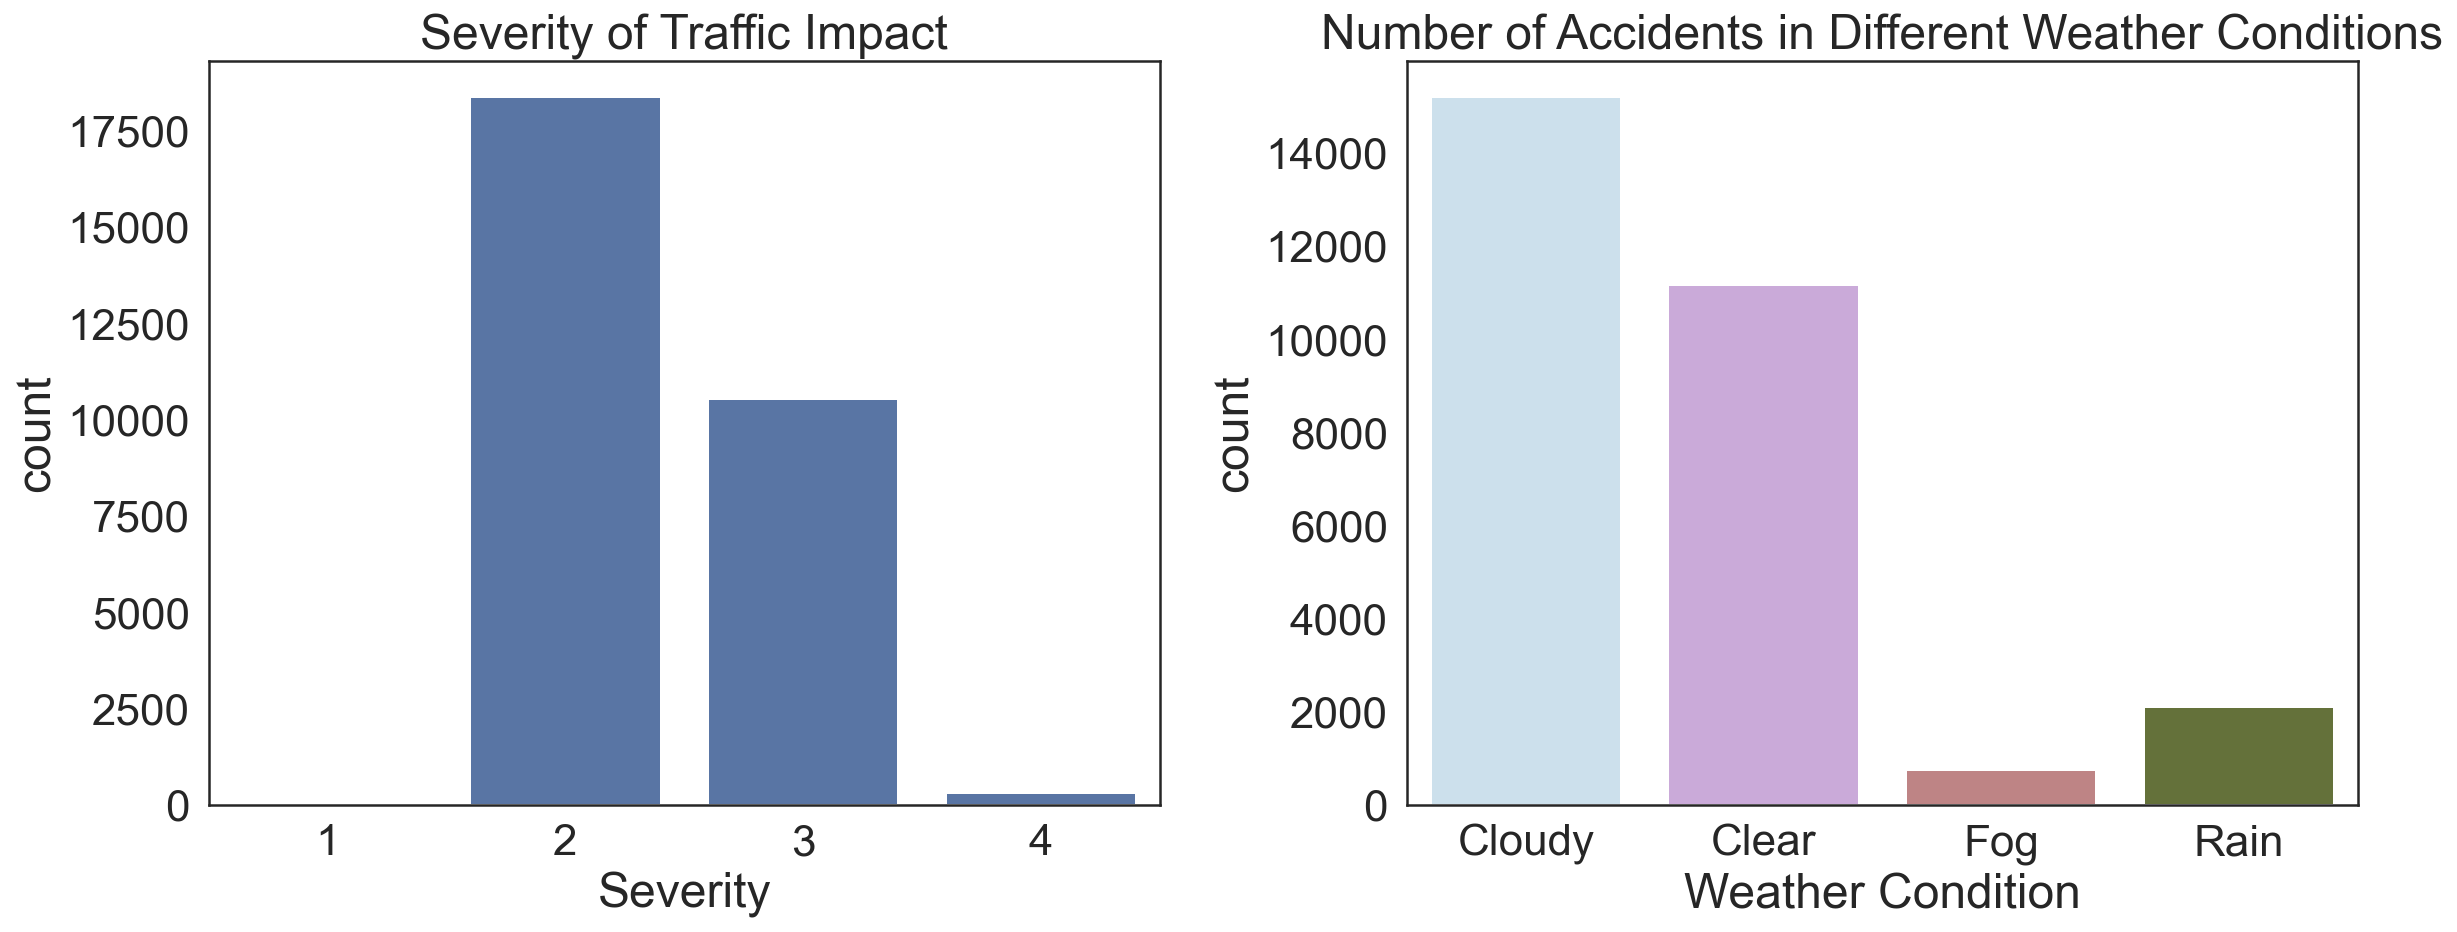

In [21]:
#distribution of traffic severity
plt.subplot(1, 2, 1) 
severity = sns.countplot(data = df, x = 'Severity', color = 'b')
severity.set_title('Severity of Traffic Impact')

#distribution of weather conditions
plt.subplot(1, 2, 2) 
weather = sns.countplot(data = df, x = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))
weather.set_title('Number of Accidents in Different Weather Conditions')
weather.set_xlabel('Weather Condition')

plt.tight_layout()

#### Interpretation/Explanation of Graphs
In the bar graph on the left, titled "Severity of Traffic Impact", the median traffic severity level caused by a car accident is level 2, and level 3 had a little over half the number of car accidents that level 2 had. The purpose of this visualization is to show the frequency of different traffic severity levels. The data on this graph is also positively skewed as there are very little to no accidents that occurred which resulted in traffic severity level 1. 

In the bar graph on the right, titled "Number of Accidents in Different Weather Conditions", we can see that there are a higher number of accidents that occurred in cloudy weather and clear weather compared to fog and rain. This is most likely due to the fact that weather in San Diego is usually clear and cloudy, so it makes sense that there are fewer accidents happening in the fog and rain.

#### 2.1b - Explore relationship between severity of traffic impact and different weather conditions (Rain, Cloudy, Clear, Fog)

Text(0, 0.5, 'Number of Accidents')

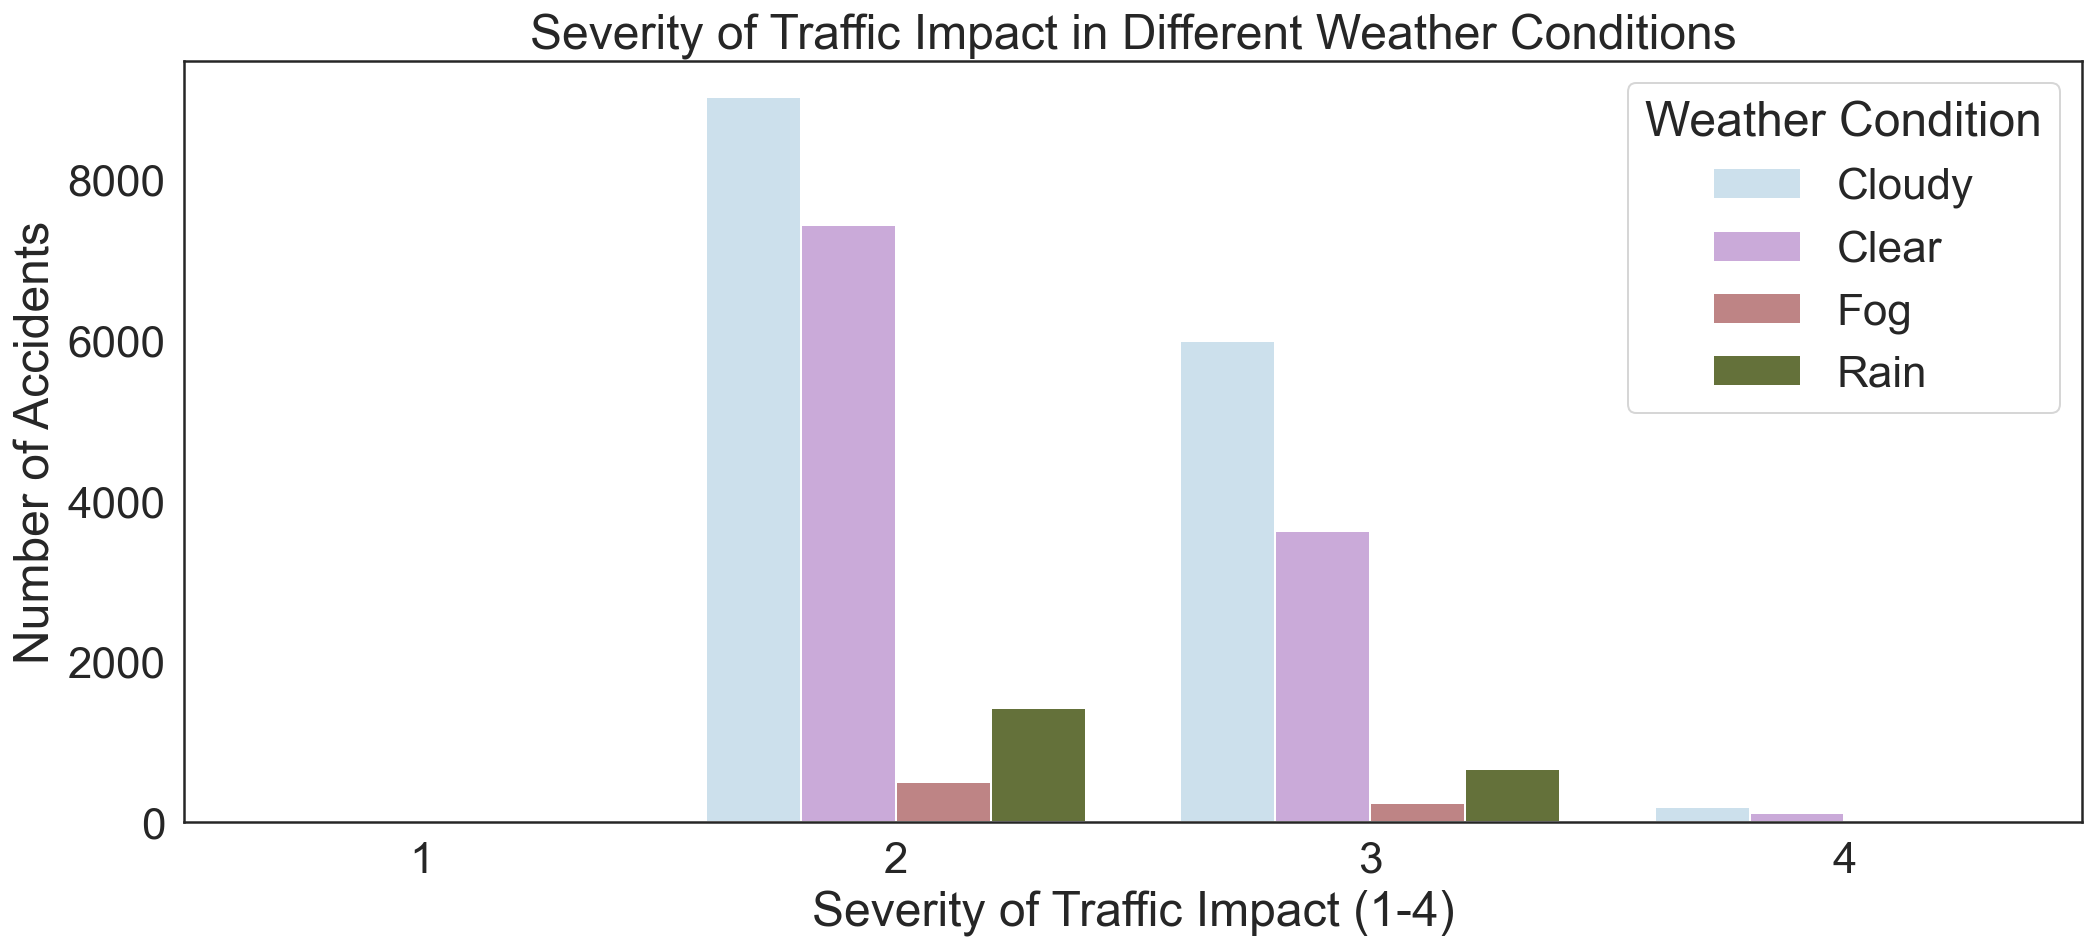

In [22]:
#show the severity of traffic impact in different weather conditions
severity_weather_condition = sns.countplot(data = df, x = 'Severity', hue = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))

#setting axis and legend titles
plt.legend(title='Weather Condition')
severity_weather_condition.set_title('Severity of Traffic Impact in Different Weather Conditions')
severity_weather_condition.set_xlabel('Severity of Traffic Impact (1-4)')
severity_weather_condition.set_ylabel('Number of Accidents')

#### Explanation/Interpretation of graph
Looking at our data visualizations, we can clearly see that there are many more accidents that caused a level 2 traffic severity than any other severity level. Regardless of traffic severity level, accidents occur the most frequently in cloudy weather conditions, with clear weather as the next most common condition. We believe that since it does not rain frequently in San Diego, there is not much data that shows the severity of traffic impact in rainy conditions. Most of the time, there are clear or cloudy skies, so we expect there to be more accidents in these two weather conditions.

#### 2.1c - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with weather conditions.
- __Alternative Hypothesis__: Traffic severity is associated with weather conditions.
- Alpha/Significance Level: 0.05
- Test Statistic: chi-squared test

We chose to use a Chi-Squared Test to determine if there is a relationship between the categorical variables and traffic severity. Different weather conditions have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between weather condition and traffic impact.

As the chi-square test compares two different categorical variables at a time, each comparison has its own null and alternative hypotheses for comparing each weather condition's severity distribution. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each weather condition as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for cloudy and clear weather"

In [23]:
#chi-squared test 

#find count values for all categorical variables
weather_count_values = df.groupby(['Severity','Weather_Condition']).size().reset_index(name='count')
weather_count_values

,Severity,Weather_Condition,count
0,1,Clear,2
1,1,Cloudy,7
2,1,Fog,1
3,2,Clear,7426
4,2,Cloudy,9021
5,2,Fog,498
6,2,Rain,1426
7,3,Clear,3624
8,3,Cloudy,5993
9,3,Fog,237


In [25]:
observed_table= pd.crosstab(df['Weather_Condition'], df['Severity']) 
observed_table = pd.DataFrame(observed_table,index=['Clear','Cloudy','Fog','Rain','Total'])
observed_table['Total'] = observed_table.sum(axis=1)
observed_table.iloc[-1] = observed_table.iloc[-1] = observed_table.sum(axis=0)
observed_table

Severity,1,2,3,4,Total
Clear,2.0,7426.0,3624.0,110.0,11162.0
Cloudy,7.0,9021.0,5993.0,182.0,15203.0
Fog,1.0,498.0,237.0,4.0,740.0
Rain,0.0,1426.0,664.0,13.0,2103.0
Total,10.0,18371.0,10518.0,309.0,29208.0


In [26]:
chi2, p, dof, expected = chi2_contingency(observed=observed_table)
expected_table = pd.DataFrame(expected,\
                                           index=['Clear','Cloudy','Fog','Rain','Total'],\
                                           columns=['1','2','3','4','Total'])
expected_table

,1,2,3,4,Total
Clear,3.821556,7020.580047,4019.512325,118.086072,11162.0
Cloudy,5.205081,9562.253937,5474.703985,160.836997,15203.0
Fog,0.253355,465.438921,266.479047,7.828677,740.0
Rain,0.720008,1322.727095,757.304643,22.248254,2103.0
Total,10.000000,18371.000000,10518.000000,309.000000,29208.0


In [27]:
p

6.402007809425852e-30

#### Conclusion of Hypothesis Test:
Since our p-value of 9.21e-30 is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by weather condition. This means our data pertaining to weather conditions and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance. 

### 2.2 - Severity of Traffic Impact: Road location

#### 2.2a -  Explore relationship between severity of traffic and different road locations (Junction, Stop Sign, Traffic Signal)

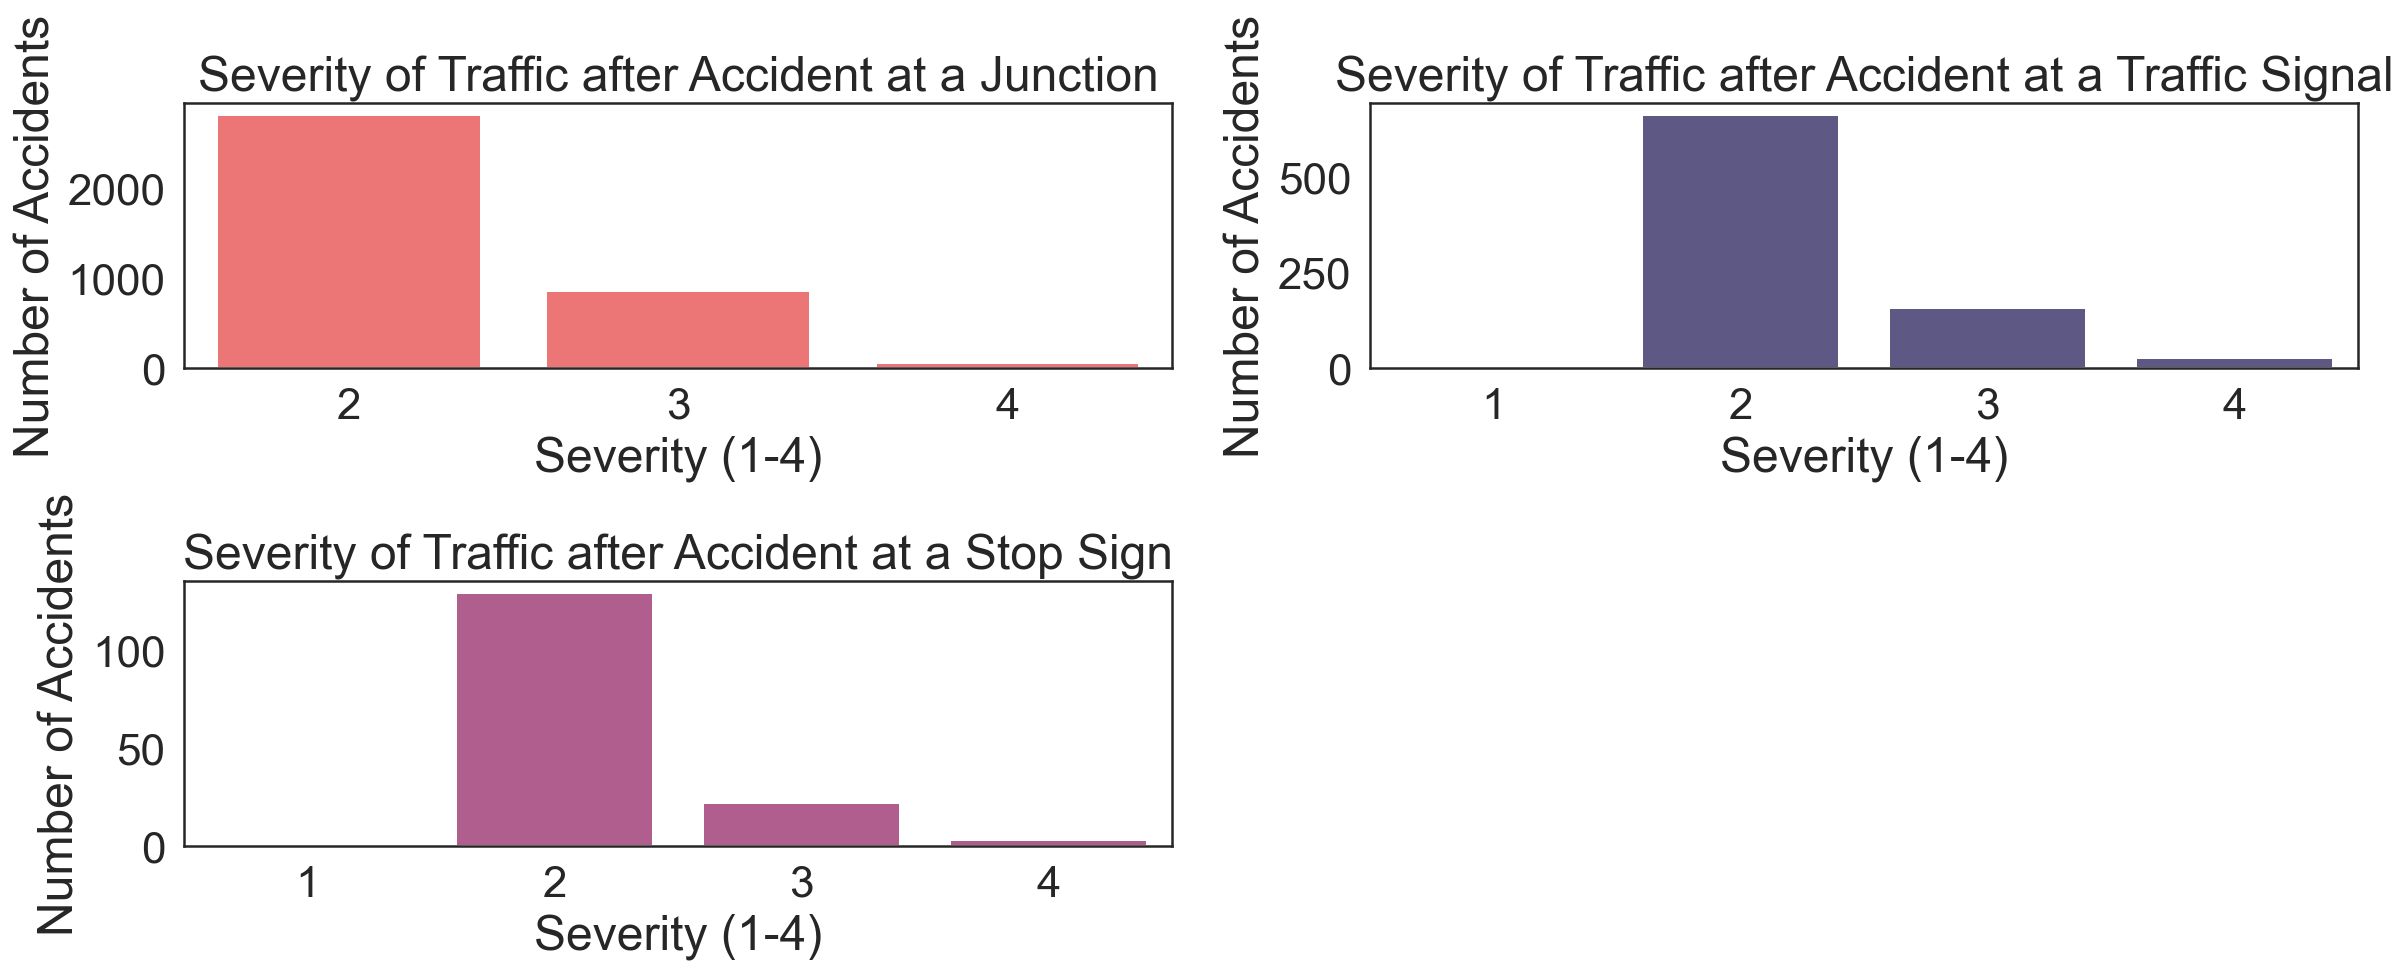

In [28]:
#severity of traffic impact due to different road locations - countplots

#severity of traffic at junction
plt.subplot(2, 2, 1)  
junction = sns.countplot(df[df['Junction'] == True ]['Severity'], color = '#ff6361')

#set axis titles
junction.set_title('Severity of Traffic after Accident at a Junction')
junction.set_xlabel('Severity (1-4)')
junction.set_ylabel('Number of Accidents')

#severity of traffic at traffic signal
plt.subplot(2, 2, 2)
traffic_signal = sns.countplot(df[df['Traffic_Signal'] == True ]['Severity'], color = '#58508d')

#set axis titles
traffic_signal.set_title('Severity of Traffic after Accident at a Traffic Signal')
traffic_signal.set_xlabel('Severity (1-4)')
traffic_signal.set_ylabel('Number of Accidents')

#severity of traffic at stop sign
plt.subplot(2, 2, 3)  
stop = sns.countplot(df[df['Stop'] == True ]['Severity'], color = '#bc5090')

#set axis titles
stop.set_title('Severity of Traffic after Accident at a Stop Sign')
stop.set_xlabel('Severity (1-4)')
stop.set_ylabel('Number of Accidents')

#set scale...?
plt.tight_layout()

#### Interpretation/Explanation of Graphs

Since we are focusing only on accidents that occurred at these three road locations - Junction, Traffic Signal, and Stop Sign - there are only 4744 observations accounted for in these graphs, as 24672 accidents had occurred at somewhere else. 

The most frequent severity of traffic (2) and highest number of accidents occurred at junctions; the second most frequent location where an accident occurred was at traffic signals, and the third most frequent was at stop signs. There is a significantly higher number of accidents that happen at junctions and much fewer accidents that happen at stop signs. The lack of accidents that occur at a stop sign could be because cars are less likely to be in motion, which reduces the chance of a collision. This would also explain why the ratio of accidents of level 2 traffic severity to overall accidents at stop signs is much higher compared to accidents at traffic signals and junctions. 

#### 2.2a - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with road locations. 
- __Alternative Hypothesis__: Traffic severity is associated with road locations.
- Alpha/Significance Level: 0.05
- Test Statistic: chi-square test

Different road locations have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between road location and traffic impact.

Each comparison of road location and its severity distribution in the chi-square test has its own null and alternative hypotheses. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each road location as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for junctions and stop signs"

In [29]:
#chi-squared test 

#find count values for all categorical variables
junc_sever = df[df['Junction']==True]['Severity'].value_counts()
sign_sever = df[df['Traffic_Signal']==True]['Severity'].value_counts()
stop_sever = df[df['Stop']==True]['Severity'].value_counts()
print(junc_sever)
print(sign_sever)
print(stop_sever)

2    2810
3     857
4      58
Name: Severity, dtype: int64
2    663
3    158
4     27
1      1
Name: Severity, dtype: int64
2    129
3     22
4      3
1      1
Name: Severity, dtype: int64


In [30]:
#Observed table based on categorical variables between severity and road location

observed_table2 = pd.DataFrame(np.array([[0,junc_sever[2],junc_sever[3],junc_sever[4]],\
                                          [sign_sever[1],sign_sever[2],sign_sever[3],sign_sever[4]],\
                                          [stop_sever[1],stop_sever[2],stop_sever[3],stop_sever[4]]]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['1','2','3','4'])
observed_table2['Total'] = observed_table2.sum(axis=1)
observed_table2 = pd.DataFrame(observed_table2,index=['Junction','Traffic Signal','Stop','Total'])
observed_table2.iloc[-1] = observed_table2.iloc[-1] = observed_table2.sum(axis=0)
observed_table2

,1,2,3,4,Total
Junction,0.0,2810.0,857.0,58.0,3725.0
Traffic Signal,1.0,663.0,158.0,27.0,849.0
Stop,1.0,129.0,22.0,3.0,155.0
Total,2.0,3602.0,1037.0,88.0,4729.0


In [31]:
chi2, p, dof, expected = chi2_contingency(observed=observed_table2)
expected_table = pd.DataFrame(expected,\
                                           index=['Junction','Traffic Signal','Stop','Total'],\
                                           columns=['1','2','3','4','Total'])
expected_table

,1,2,3,4,Total
Junction,1.575386,2837.270036,816.837598,69.316980,3725.0
Traffic Signal,0.359061,646.669063,186.173187,15.798689,849.0
Stop,0.065553,118.060901,33.989215,2.884331,155.0
Total,2.000000,3602.000000,1037.000000,88.000000,4729.0


In [32]:
p

0.00015418854459044455

#### Conclusions of Hypothesis Test:
Since our p-value is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by road location of the car crash. This means our data pertaining to the road location of accidents and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance. 

### 2.3 - Severity of Traffic: Interaction

#### 2.3a - Explore how the interaction between different weather conditions and road location impacts traffic severity

In [33]:
#will do later
#heat map of the mean severity and number of accidents based on weather and location
#maybe have two side by side (one mean, one number)

heatmap_df = pd.DataFrame(df, columns = ['Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal', 'Other place'])
heatmap_df
#severity_mean = df['Severity'].mean()

confusion_matrix = pd.crosstab(df['Weather_Condition'], df['Junction'], rownames=['Weather Condition'], colnames=['Junction'])
print (confusion_matrix)


Junction           False  True 
Weather Condition              
Clear               9693   1469
Cloudy             13331   1872
Fog                  628    112
Rain                1831    272


In [34]:
#heat_map = expected_table.iloc[:3]
#heat_map = heat_map.drop(columns='Total')
#heat_map
#plt.figure(figsize=(12,8)) 
#sns.heatmap(heat_map, annot=True, cmap="YlGnBu")